In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sgfnbtotal = pd.read_csv('licensed-food-establishments-by-category-annual.csv')
sgpop = pd.read_csv('singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv')
sgecon = pd.read_csv('per-capita-gni-and-per-capita-gdp-at-current-prices-annual.csv')
healthprob = pd.read_csv('prevalence-of-hypertension-diabetes-high-total-cholesterol-obesity-and-daily-smoking.csv')

In [3]:
#dataset cleaning process
healthprob.dtypes

year                int64
disease            object
prevalence_rate    object
dtype: object

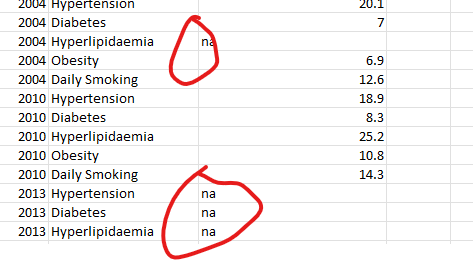

In [4]:
#convertion from object to int64
healthprob['prevalence_rate'] = pd.to_numeric(healthprob['prevalence_rate'], errors='coerce').fillna(0).astype(np.int64)

In [5]:
healthprob.info

<bound method DataFrame.info of     year          disease  prevalence_rate
0   1992     Hypertension               16
1   1992         Diabetes                7
2   1992  Hyperlipidaemia                0
3   1992          Obesity                5
4   1992    Daily Smoking               18
5   1998     Hypertension               21
6   1998         Diabetes                7
7   1998  Hyperlipidaemia                0
8   1998          Obesity                6
9   1998    Daily Smoking               15
10  2004     Hypertension               20
11  2004         Diabetes                7
12  2004  Hyperlipidaemia                0
13  2004          Obesity                6
14  2004    Daily Smoking               12
15  2010     Hypertension               18
16  2010         Diabetes                8
17  2010  Hyperlipidaemia               25
18  2010          Obesity               10
19  2010    Daily Smoking               14
20  2013     Hypertension                0
21  2013         Diabe

In [6]:
healthprob.head()

,year,disease,prevalence_rate
0,1992,Hypertension,16
1,1992,Diabetes,7
2,1992,Hyperlipidaemia,0
3,1992,Obesity,5
4,1992,Daily Smoking,18


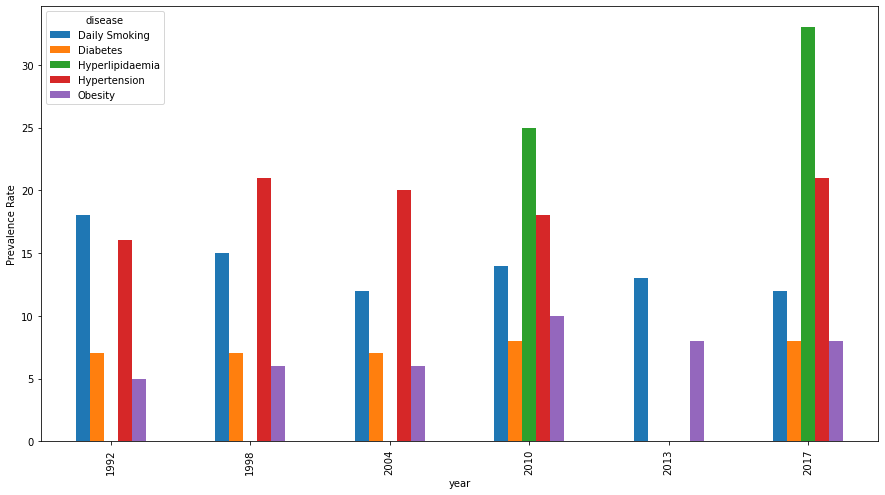

In [7]:
healthprob.pivot(index='year', columns='disease', values='prevalence_rate').plot(kind='bar', figsize=(15,8)) 
plt.ylabel('Prevalence Rate')
plt.show()

In [8]:
sgecon.tail(5)

,year,level_1,value
113,2016,Per Capita GDP,78364
114,2017,Per Capita GNI,77474
115,2017,Per Capita GDP,83265
116,2018,Per Capita GNI,81222
117,2018,Per Capita GDP,87108


In [9]:
sgecon.rename(columns={"level_1": "GDPGNI", "value" : "SGD"}, inplace=True)

In [10]:
GDP = sgecon.loc[(sgecon['GDPGNI'].str.startswith('Per Capita GDP')),['year','GDPGNI','SGD']]
GNI = sgecon.loc[(sgecon['GDPGNI'].str.startswith('Per Capita GNI')),['year','GDPGNI','SGD']]

In [11]:
GDP.rename(columns={"level_1": "GDPGNI", "SGD" : "GDP"}, inplace=True)
GNI.rename(columns={"level_1": "GDPGNI", "SGD" : "GNI"}, inplace=True)

In [12]:
GDP.head()

,year,GDPGNI,GDP
1,1960,Per Capita GDP,1310
3,1961,Per Capita GDP,1375
5,1962,Per Capita GDP,1445
7,1963,Per Capita GDP,1565
9,1964,Per Capita GDP,1486


In [13]:
sgecon.isnull().any()

year      False
GDPGNI    False
SGD       False
dtype: bool

In [14]:
sgecon.dtypes

year       int64
GDPGNI    object
SGD        int64
dtype: object

In [15]:
sgpop.head()

,year,level_1,level_2,value
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280
3,1957,Total Residents,15 - 19 Years,135679
4,1957,Total Residents,20 - 24 Years,119266


In [16]:
sgfnbtotal.head()

,year,level_1,value
0,1993,Total Licensed Food Establishments,20642
1,1994,Total Licensed Food Establishments,19854
2,1995,Total Licensed Food Establishments,20245
3,1996,Total Licensed Food Establishments,17547
4,1997,Total Licensed Food Establishments,22234


In [17]:
sgfnbtotal.tail()

,year,level_1,value
20,2013,Total Licensed Food Establishments,31267
21,2014,Total Licensed Food Establishments,32166
22,2015,Total Licensed Food Establishments,33074
23,2016,Total Licensed Food Establishments,34032
24,2017,Total Licensed Food Establishments,35169


In [18]:
sgpop.rename(columns={"level_1": "residents", "level_2": "age", "value" : "population"}, inplace=True)
sgfnbtotal.rename(columns={"level_1": "license", "value" : "outlets"}, inplace=True)

In [19]:
sgpop.head()

,year,residents,age,population
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280
3,1957,Total Residents,15 - 19 Years,135679
4,1957,Total Residents,20 - 24 Years,119266


In [20]:
sgfnbtotal.head()

,year,license,outlets
0,1993,Total Licensed Food Establishments,20642
1,1994,Total Licensed Food Establishments,19854
2,1995,Total Licensed Food Establishments,20245
3,1996,Total Licensed Food Establishments,17547
4,1997,Total Licensed Food Establishments,22234


In [21]:
sgfnbtotal

,year,license,outlets
0,1993,Total Licensed Food Establishments,20642
1,1994,Total Licensed Food Establishments,19854
2,1995,Total Licensed Food Establishments,20245
3,1996,Total Licensed Food Establishments,17547
4,1997,Total Licensed Food Establishments,22234
5,1998,Total Licensed Food Establishments,23416
6,1999,Total Licensed Food Establishments,24262
7,2000,Total Licensed Food Establishments,24514
8,2001,Total Licensed Food Establishments,25162
9,2002,Total Licensed Food Establishments,25420


In [22]:
sgpop.tail()

,year,residents,age,population
20455,2018,Other Ethnic Groups (Females),65 Years & Over,3386
20456,2018,Other Ethnic Groups (Females),70 Years & Over,2087
20457,2018,Other Ethnic Groups (Females),75 Years & Over,1362
20458,2018,Other Ethnic Groups (Females),80 Years & Over,842
20459,2018,Other Ethnic Groups (Females),85 Years & Over,437


In [23]:
sgfnbtotal.isnull().any()

year       False
license    False
outlets    False
dtype: bool

In [24]:
sgpop.isnull().any()

year          False
residents     False
age           False
population    False
dtype: bool

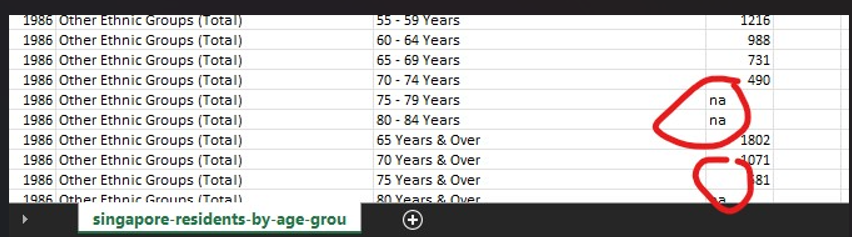

In [25]:
sgpop.dtypes

year           int64
residents     object
age           object
population    object
dtype: object

In [26]:
#convertion from object to int64
sgpop['population'] = pd.to_numeric(sgpop['population'], errors='coerce').fillna(0).astype(np.int64)

sgpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        20460 non-null  int64 
 1   residents   20460 non-null  object
 2   age         20460 non-null  object
 3   population  20460 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 639.5+ KB


In [27]:
sgpop.isnull().sum()

year          0
residents     0
age           0
population    0
dtype: int64

In [28]:
sgfnbtotal.dtypes

year        int64
license    object
outlets     int64
dtype: object

In [29]:
totalpop2017 = sgpop.loc[(sgpop['year']==2017) & (sgpop['residents'].str.startswith('Total Residents'))]
totalpop2017

,year,residents,age,population
19800,2017,Total Residents,0 - 4 Years,187653
19801,2017,Total Residents,5 - 9 Years,200575
19802,2017,Total Residents,10 - 14 Years,206253
19803,2017,Total Residents,15 - 19 Years,232973
19804,2017,Total Residents,20 - 24 Years,259072
19805,2017,Total Residents,25 - 29 Years,290198
19806,2017,Total Residents,30 - 34 Years,279340
19807,2017,Total Residents,35 - 39 Years,300956
19808,2017,Total Residents,40 - 44 Years,311484
19809,2017,Total Residents,45 - 49 Years,303457


In [30]:
age0to14 = totalpop2017.iloc[0:3].sum()
age15to64 = totalpop2017.iloc[3:13].sum()
age65nover = totalpop2017.iloc[13:22].sum()

In [34]:
age0to14['population']

594481

In [35]:
age15to64['population']

2854623

In [36]:
age65nover['population']

1640612

In [37]:
#charting

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,5

labels = 'Age0to14', 'age15to64', 'age65nover'
frequency = [age0to14['population'],age15to64['population'],age65nover['population']]

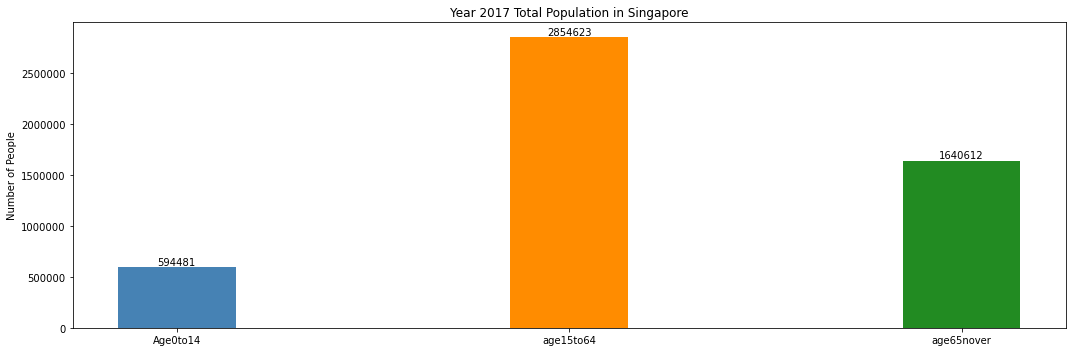

In [38]:
x_pos = np.arange(len(labels))

plt.bar(x_pos, frequency, width=0.3, color=['steelblue', 'darkorange', 'forestgreen'])

def addlabels(labels,frequency):
    for i in range(len(labels)):
        plt.text(i, frequency[i], frequency[i], ha = 'center', fontsize ='10', va='bottom')

addlabels(labels, frequency)



plt.ticklabel_format(style='plain')
plt.ylabel("Number of People")
plt.title("Year 2017 Total Population in Singapore")
plt.xticks(x_pos, labels)
plt.tight_layout()
plt.show()

#Foodlabels and foodfrequency Data from 
#https://www.singstat.gov.sg/-/media/files/publications/reference/yearbook_2018/yos2018.pdf - Page316 alternative page for 334, 

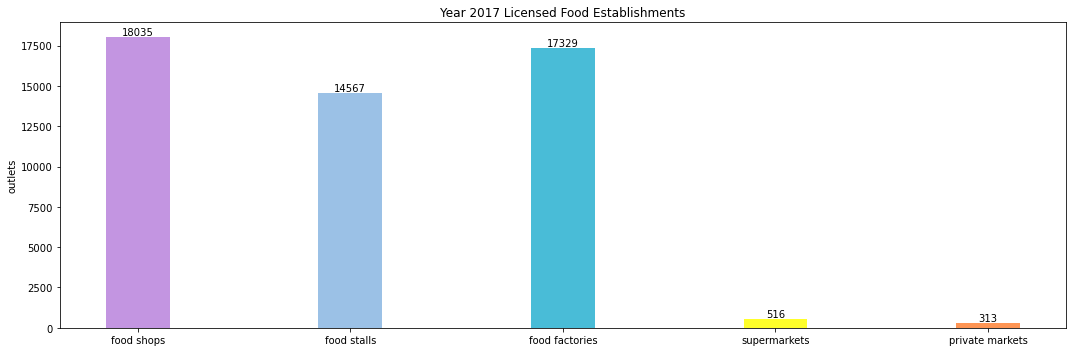

In [39]:
foodlabels = 'food shops','food stalls','food factories','supermarkets','private markets'
foodfrequency =[18035,14567,17329,516,313]
x_pos1 = np.arange(len(foodlabels))

plt.bar(x_pos1, foodfrequency, width=0.3, color=['#c395e1', '#9bc1e6', '#49bcd7','#ffff2b','#fe9554'])

def addlabels1(foodlabels,foodfrequency):
    for i in range(len(foodlabels)):
        plt.text(i, foodfrequency[i], foodfrequency[i], ha = 'center', fontsize ='10', va='bottom')
        

addlabels1(foodlabels, foodfrequency)



plt.ticklabel_format(style='plain')
plt.ylabel("outlets")
plt.title("Year 2017 Licensed Food Establishments")
plt.xticks(x_pos1, foodlabels)
plt.tight_layout()
plt.show()

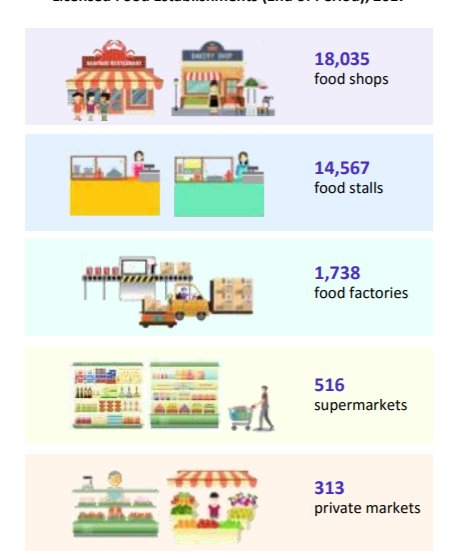

In [40]:
GNI2017 = GNI.iloc[50:58]
GNI2017

,year,GDPGNI,GNI
100,2010,Per Capita GNI,63712
102,2011,Per Capita GNI,65454
104,2012,Per Capita GNI,66330
106,2013,Per Capita GNI,67444
108,2014,Per Capita GNI,70400
110,2015,Per Capita GNI,71283
112,2016,Per Capita GNI,72909
114,2017,Per Capita GNI,77474


In [41]:
GDP2017 = GDP.iloc[50:58]
GDP2017

,year,GDPGNI,GDP
101,2010,Per Capita GDP,64408
103,2011,Per Capita GDP,67783
105,2012,Per Capita GDP,69417
107,2013,Per Capita GDP,71283
109,2014,Per Capita GDP,72938
111,2015,Per Capita GDP,76503
113,2016,Per Capita GDP,78364
115,2017,Per Capita GDP,83265


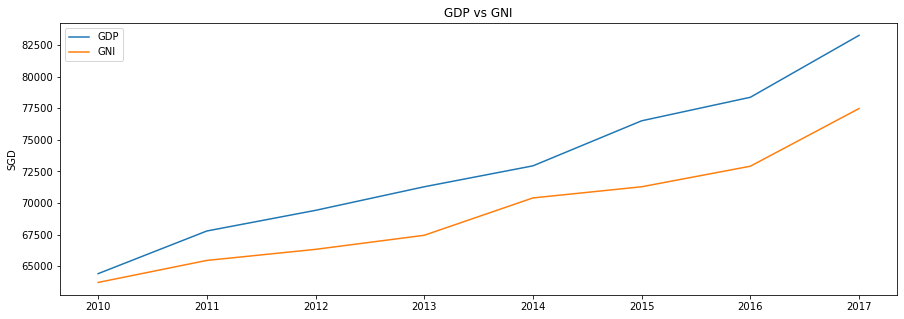

In [42]:

GNI2017 = GNI.iloc[50:58]
GDP2017 = GDP.iloc[50:58]
fnb2017 = sgfnbtotal.iloc[17:29]



plt.plot(GDP2017['year'],GDP2017['GDP'], label='GDP')
plt.plot(GNI2017['year'],GNI2017['GNI'], label='GNI')
plt.ylabel('SGD')
plt.legend()
plt.title('GDP vs GNI')
plt.show()


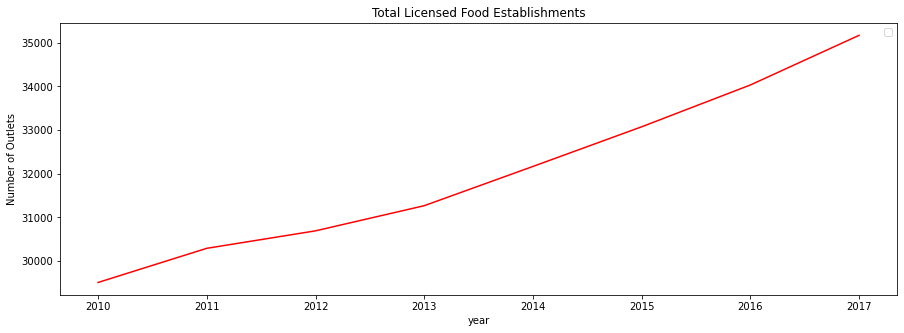

In [43]:
fnb2017.plot('year','outlets','line',c='red')
plt.legend('')
plt.title('Total Licensed Food Establishments')
plt.ylabel('Number of Outlets')
plt.show()

In [44]:
sgfnbtotal.iloc[18:25]

,year,license,outlets
18,2011,Total Licensed Food Establishments,30291
19,2012,Total Licensed Food Establishments,30691
20,2013,Total Licensed Food Establishments,31267
21,2014,Total Licensed Food Establishments,32166
22,2015,Total Licensed Food Establishments,33074
23,2016,Total Licensed Food Establishments,34032
24,2017,Total Licensed Food Establishments,35169


In [45]:
import folium

from folium.plugins import HeatMap

mapsg = folium.Map(location=[1.2950, 103.8583], zoom_start=12)


#Data are samples of shopping malls
data = [
    [1.2842, 103.8511, 0.91], #one raffles place
    [1.2770, 103.8458, 0.95], #tanjong pagar centre
    [1.3007, 103.8550, 0.85], #bugis junction
    [1.2644, 103.8222, 0.8], #Vivocity
    [1.4293, 103.8359,0.6], #Northpoint
    [1.3115, 103.8562,0.7], #CSM
    [1.4361, 103.7859,0.8], #causeway point
    [1.3726, 103.8937,0.7], #Hougang mall
    [1.3468, 103.7125,0.6], #Boon lay shopping mall
    [1.3851, 103.7449, 0.5], #Lot 1
    [1.3048, 103.8238, 0.8], #tanglin mall
    [1.3348, 103.7468,0.9], #imm
    [1.3523, 103.9451,0.88] #tampiness mall
]

HeatMap(data).add_to(mapsg)

mapsg


Thank You!


